$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import rcParams
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *Morin 4.5*
* *French 5, roughly the 1st half.*

# Expectations

## Remember

* A normal mode of oscillation occurs by definition when all of the components of a coupled system of oscillators oscillate at the same frequency. It is an object that is shared globally, by *all* of the components of the oscillator;
* That the modes are completely independent when the system is linear; they all have their own quantity of energy;
* The definitions of normal frequencies, normal modes, normal coordinates. 
* That the word 'normal' is equivalent to the prefix 'eigen';
* The determinant of a $2\times2$ matrix.
* Any solution of an initial value problem (IVP) can be written as a linear combination of the $n$ eigenmodes.

## Understand

* What a degree of freedom is.
* The connection between the modes of a coupled oscillator system and the theory of eigenvectors and eigenvalues (or at least begin to make the connection).

## Apply

* A systematic approach to retrieve all of the normal-stuff is to solve an eigenvalue/vector problem. Remember how to cast the equations of motion into a matrix equation, and how to proceed to find all of the eigen-stuff (solve for the roots of the determinant, replace $\omega$ by $\omega_n$ to find the eigenvectors, maybe normalize).
* Worked examples, tutorials and problem sets.

# Introduction

This lecture is a pivotal chapter in this lecture series, because it makes the transition between the behaviour of simple oscillators and wave behaviour.
However, these two things look very, very different.
Where does the connection happen?

Here is the pivot, and understanding it is pretty much the goal of this lecture: when two oscillators are coupled, i.e., the motion of one oscillator is influenced by the motion of the other, any motion that ensues can be thought of as a linear combination of two orthogonal types of motion.
The features of these orthogonal types of motion can be found by solving for the eigenmodes of the matrix, corresponding to the $2\times2$ linear system of equations of the two oscillators.
Each orthogonal mode of motion evolves independently, and its evolution equation is that of a simple harmonic oscillator.
Physically, the most visible manifestation of one single mode of motion is that all parts of the coupled system of oscillators oscillate at the same frequency, while a different mode will have those parts oscillate at different frequencies.

In the next lecture, we will see that if an infinite number of oscillators are coupled, the number of orthogonal modes of motion are not to the number of two, but are infinite.

From now on, in order to simplify the presentation, we neglect damping unless otherwise stated.

But first, let's take a look at the go-to experimental demo of this chapter: the coupled pendulums (also at https://youtu.be/BSC0HG1Nz74 and https://play.library.utoronto.ca/a185a674af2647fc6639939b765f7454).

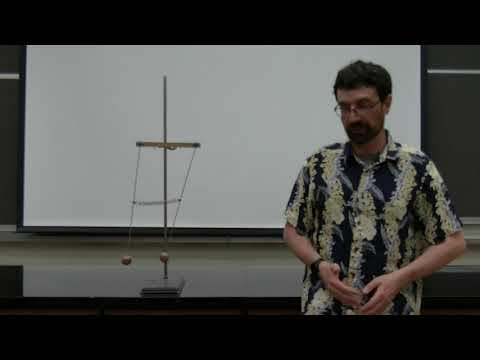

In [2]:
YouTubeVideo('BSC0HG1Nz74', width=560, height=315)

# Two Pendulums and a Spring

## Qualitative considerations

### Setup

Let me use the example of the setup is shown in French's fig. 5-2, reproduced below. 

* Two pendulums of identical lengths $\ell$.
* At the end of a each pendulum, two identical masses $m$ hang.
* The masses are attached via a spring of stiffness $k$. The masses are placed at a distance such that at rest, the spring is neither stretched or compressed.


![From A.P. French, p. 121](CoupledPendulumsFrench.png)

Let's call $B$ the mass on the left, and $A$ the mass on the right.
$x_A$ and $x_B$ are the *horizontal* distances of each mass from their respective rest positions.
I will show how a systematic mathematical treatment of the equations of motion reveals that there are two "natural", i.e., normal, modes of motion.
But first, let me introduce them qualitatively.

### Antisymmetric Normal Mode

![Fig. 3: the antisymmetric normal mode](pendulum_syn.gif)

Imagine that at $t=0$, $x_{A0} = x_{B0} = A$, and both masses are held steady initially (no initial velocity).
Since the motion of both masses is initialized in the same way, and both pendulums have the same natural frequency $\omega_p = \sqrt{g/\ell}$, they would naturally oscillate in perfect sync, with same amplitude and in phase:

$$ x_A(t) = x_B(t) = A\cos(\omega_1 t). $$

The spring is neither stretched or compressed, and therefore plays no role in this motion.
Here is why this mode of motion is what we call a normal mode:
**all elements of the coupled system oscillate at the same frequency**, $\omega_1 =\omega_p$ here.

### Symmetric Normal Mode

![Fig. 4: the symmetric normal mode](pendulum_asyn.gif)

We can come up with another type of motion, for which each mass will oscillate sinusoidally with a well-defined frequency.

Our initial conditions are now $x_{A0} = -x_{B0} = A$, with zero initial velocity again. By symmetry, one can expect the motion to now be described by 

$$ x_A(t) = A\cos(\omega_2 t)\quad\textrm{and}\quad x_{B}(t) = A\cos(\omega_2 t +\pi). $$

I.e., both positions will oscillate $\pi$ rad (or 180$^\circ$) out of phase, and with a single angular frequency $\omega_2$.
What $\omega_2$ is, is not trivial at this point, because it will include effects due to both restoring forces, i.e., weight and the spring tension.
I will derive it soon after, but at this point, I want you to remember that the type of motion is a normal mode because **both pendulums oscillate at the same frequency.**

Could I find a third normal mode?
The answer is no, because there are only two degrees of freedom (the positions of the masses).
Is it obvious?
Again, the answer is no.
The definitive proof is a basic result of linear algebra.
In this chapter, I will simply show that these forms of motion appear naturally out of the equations of motion, that no other normal mode is apparent, and that any other form of motion can be described as a linear combination of both forms of motion.

## General Derivation

Let us now drop any symmetry assumption.
The positions $x_A(t)$ and $x_B(t)$ are just what they are, like in French's fig. 5-5, reproduced below.

![From A.P. French, fig. 5-5](French_5_5.png)

### Linearization and basic equations

Recall that for $\theta \ll 1$, $\sin\theta \approx \theta\approx \tan\theta$ and $\cos\theta \approx 1$.

We assume that the motion of each pendulum is very small, meaning we can linearize.
For the sake of example, take mass $A$, call $\theta$ the angle of pendulum $A$ and take the rest position as the origin, namely, $x_A=y_A=0$ when $\theta=0$.

* The **horizontal position** of mass $A$ when the angle of the pendulum $\theta \neq 0$ is $x_A = \ell\sin\theta \approx \ell \theta$.
* The **gravitational force along the $\bs{x}$-direction is zero**, but the tension $\vec T$ in the pendulum arm, connecting the mass to the arm, isn't. 
    In the vertical direction, $T_y =|\vec T|\cos\theta \approx |\vec T|$.
    The vertical position is $y = \ell(1-\cos\theta) \approx \ell\theta^2/2$, and its vertical acceleration is negligible.
    This last bit is because $y$ barely changes and its acceleration therefore has to be much smaller that the other two forces, which balance each other out (to prove it rigorously would take a fair bit of calculus; it is not the focus of this lecture, and I feel like the conclusion is fairly intuitive).
    At any rate, the FBD in the vertical would therefore yield $0 \approx T_y - mg \Rightarrow |\vec T| \approx mg$.
* The **horizontal projection of the tension $\bs{\vec T}$** is therefore $-|\vec T|\sin\theta \approx  -mg x_A/\ell$.
* Finally, because all angles are small, the elongation of the spring is approximately equal to $x_A-x_B$.
    Figuring the sign of the spring force can be tricky, so do the following thought experiment.
    If $x_B$ is held at zero and $x_A$ moved to the right (positive direction), the spring force is $-kx_A$. Now moving $x_B$, the force becomes $-k(x_A - x_B)$.

The FBD on mass $A$ then leads us to the conclusion that $m \ddot x_A = -\frac{mg}\ell x_A - k(x_A - x_B)$,
\begin{equation}
\thrfor \ddot x_A + \omega_p^2 + \omega_s^2(x_A - x_B) = 0,
\label{eq:mxA}
\end{equation}
where we recall that $\omega_p = \sqrt{g/\ell}$ is the natural angular frequency of the pendulum and $\omega_s = \sqrt{k/m}$ is the natural angular frequency of the \{mass A + spring\} system.

Symmetric considerations about mass $B$ would yield 
\begin{equation}
\ddot x_B + \omega_p^2 + \omega_s^2(x_B - x_A) = 0.
\label{eq:mxB}
\end{equation}

Both equations are almost the same, except that the terms that result from the spring tension, which couples the motion of both masses, are opposite.

### Change of variables

It is not obvious at first, how to solve for $x_A$ and $x_B$ with this coupling term involved.
The method we use is a **change of variables.**
Define
$$ q_1 = x_A + x_B \andeq q_2 = x_A - x_B.$$

One simple way to make them appear is to sum and subtract equation \eqref{eq:mxA} and \eqref{eq:mxB}:

* $\eqref{eq:mxA} + \eqref{eq:mxB} \quad\Rightarrow\quad \ddot q_1 + \omega_1^2 q_1 = 0$.

    This is the equation for an SHO of angular frequency $\omega_1 = \omega_p$.
    The antisymmetric mode of motion that I described earlier on was also oscillating at frequency $\omega_p$, because the spring wasn't stretching or compressing, and therefore the presence of said spring was not modifying the pendulum natural frequency $\omega_p$.
    And since it was characterized by $x_A(t) = x_B(t)$, it corresponded to $q_1 = 2x_A = 2x_B \neq 0$ and $q_2 = 0$.

    *Note: why do I feel the need to introduce $\omega_1$ on top of $\omega_p$? Because in general, no frequency of the normal modes is equal to one of the frequencies of the uncoupled oscillators. In this simple case, yes, but I do not want to give false impressions.*

* $\eqref{eq:mxA} - \eqref{eq:mxB} \quad\Rightarrow\quad \ddot q_2 + \omega_p^2 q_2 + 2\omega_s^2 q_2 = 0.$

    Or, defining $\omega_2^2 = \omega_p^2 + 2\omega_s^2$,
    $$ \ddot q_2 + \omega_2^2 q_2 = 0. $$
    Recall the symmetric oscillation mode: it was characterized by $x_A = -x_B$, and therefore $q_1 = 0$ and $q_2 = 2x_A = -2x_B \neq 0.$
    I had also mentioned, back then, that $\omega_2^2$ was not trivial, because it was a mix of the influences of gravity and spring tension.
    Indeed, here, $\omega_2$ does contain both the influences of gravity (via $\omega_p^2$) and spring tension (via $2\omega_s^2$).
    Therefore, this mode corresponds to the symmetric mode of motion.

#### Comments (to be remembered!)

* Modes of oscillations cannot be thought on as simple oscillations anymore, with one object or easily identifiable quantity such as mass position describing an oscillation. It is a **global** concept in which **all** components of one coupled system of oscillators oscillate in phase, at the same frequency, as if described by a (D or S)HO model.
* The oscillations of each individual component are not independent from each other, but **the modes are completely independent**: there is no trace of $q_1$ in the equation for $q_2$, and vice-versa. It means that if one initiates the coupled system in a funky way, and the coupled system does a weird dance of oscillations, the degree of complexity is actually finite: one mode has a certain amplitude and a certain phase, and the other mode has a certain amplitude, presumably different, and a certain phase shift with the first mode. The pattern of oscillations might look crazy, but there are only two modes, and they don't exchange momentum from one to the other as long as the system is linear.
* $q_1$ and $q_2$ are called the **normal coordinates**, or **eigencoordinates**, of the **normal modes**, or **eigenmodes**. Their respective **normal frequencies**, or **eigenfrequencies**, are $\omega_1$ and $\omega_2$.

It is as if there is a physical space, in which physical coordinates $x_A$ and $x_B$ exist, and a dual space, in which $q_1$ and $q_2$ exist.
Both spaces describe the same physical reality, but because they don't describe it in the same way, the "dual" space may be more useful in some cases, including this one.

We mentioned this dual space before, though in different terms.
When you start studying Fourier series and later on Fourier analysis, you may call this dual space the "Fourier" space, or "spectral" space.
It has nothing to do with Halloween, and everything to do with the fact that the visualization of the physical reality in this dual space is called a (Fourier) spectrum, which looks like the display on a sound equalizer (and it is not a coincidence).
I may use the term "Fourier" inadvertently, by force of habit.

## More on the Independence of the Modes

### General solution as a linear superposition of all modes

A bit more algebra, because I want to drive home the fact that the two modes are independent.
If the coupled system is initiated somewhat randomly, both modes of oscillation will coexist.
They both are solutions of two different SHO equations, and their expressions are therefore
$$q_1 = C_1\cos(\omega_1 t + \phi_1)\andeq q_2 = C_2\cos(\omega_2 t + \phi_2).$$

In physical coordinates, this translates into
$$ x_A = \frac{q_1 + q_2}2 = \frac12\left[C_1\cos(\omega_1 t + \phi_1) + C_2\cos(\omega_2 t + \phi_2) \right],$$
$$ x_B = \frac{q_1 - q_2}2 = \frac12\left[C_1\cos(\omega_1 t + \phi_1) - C_2\cos(\omega_2 t + \phi_2) \right].$$

Meaning that any motion can be considered a linear superposition of the two modes.
For the motion of the antisymmetric mode, $C_2 = 0$, for the symmetric mode, $C_1 = 0$, and in general, $C_1\neq 0$ and $C_2\neq 0$.

#### Energetic independence of the modes

Here I show that the two modes each have a certain amount of energy, and that this energy does not get traded from one mode to the other.
The kinetic energies of $A$ and $B$ are 
$$ K_{A, B} = \frac12 m(\dot x_{A, B})^2.$$

The restoring force due to gravity applied to one mass, by way of the tension in the pendulum, is $-mgx_{A, B}/\ell$, and therefore their gravitational potential energies are minus the anti-derivatives,
$$ U^{(g)}_{A, B} = \frac12 m\omega_p^2 x_{A, B}^2.$$

Finally, the potential energy stored in the spring is
$$ U^{(s)}  = \frac12 k (x_A - x_B)^2 = \frac12 m\omega_s^2 (x_A - x_B)^2.$$ 

The total energy stored in the coupled system is therefore
\begin{align*}
    E & = K_A + K_B + U^{(g)}_A + U^{(g)}_B + U^{(s)}, \\ 
      & = \frac m2\left[(\dot x_A)^2 + (\dot x_B)^2 + \omega_p^2 \left(x_A^2 + x_B^2\right) + \omega_s^2 (x_A - x_B)^2\right], \\
      & = E_1 + E_2,
\end{align*}
with 
$$ E_1 = \frac14 m \left[(\dot q_1)^2 + \omega_1^2 q_1^2\right]\andeq E_2 = \frac14 m \left[(\dot q_2)^2 + \omega_2^2 q_2^2\right],$$
which you can check by plugging in the definitions of $q_1$ and $q_2$ in $E_1$ and $E_2$ above, and by 
recalling that $\omega_1^2 = \omega_p^2$ and $\omega_2^2 = \omega_p^2 + 2\omega_s^2$.

As for the coordinates, each reservoir of energy, $E_1$ and $E_2$, is uncoupled from the other one: **there is no exchange of energy from one mode of motion to the other**.
This is true for any system of coupled oscillators, as long as the linear model is valid.

## Beating Phenomenon

When a coupled system contains two frequencies that are very close to each other, and the two modes beat with similar amplitudes, we observe beating physical space.

Indeed, take the solutions we derived earlier in physical space, but let us assume that $\phi_1 = \phi_2 = 0$.
As we saw before, it can be physically realized by choosing initial conditions appropriately.
But more basically, the phase shifts won't fundamentally change what I am about to describe anyway, so we might as well choose easy ones.
$$ x_A = \frac12\left[C_1\cos(\omega_1 t) + C_2\cos(\omega_2 t) \right],$$
$$ x_B = \frac12\left[C_1\cos(\omega_1 t) - C_2\cos(\omega_2 t) \right].$$

Let us also consider the case $C_1 = C_2 = C$, because it is the simplest case that can illustrate the beating phenomenon:
$$ x_A = \frac C2\left[\cos(\omega_1 t) + \cos(\omega_2 t) \right] = C\cos\left(\Omega t\right)\cos\left(\Delta\omega t\right),$$
$$ x_B = \frac C2\left[\cos(\omega_1 t) - \cos(\omega_2 t) \right] = C\sin\left(\Omega t\right)\sin\left(\Delta\omega t\right),$$
with $\Delta\omega = (\omega_2 - \omega_1)/2$ and $\Omega = (\omega_1 + \omega_2)/2$, as we saw in lecture 2.

Beating is especially pronounced if $\Delta\omega \ll \Omega$, as plotted below.

In [3]:
def plot_beating(k, l, ratioA):
    """ This function creates two oscillations, and plots each of them
    separately as well as a superposition of
    INPUT:
    l is the length of the pendulums, increasing it increases periods
    k is the stiffness of he spring. Increasing it increases the difference
        between the two frequencies. """
    # basic quantities
    m = 0.4  # mass [kg]
    g = 9.81  # gravitational acceleration [m/s2]
    C1 = 1.e-1  # amplitude of mode 1 [m]
    C2 = ratioA*C1  # amplitude of mode 2 [m]
    ftsz = 11  # font size on plots
    lnwt = 1
    t_end = 60.

    # derived quantities
    t = np.linspace(0., t_end, 2048)
    omega_p = np.sqrt(g/l)  # natural frequency of uncoupled pendulum
    omega_s = np.sqrt(k/m)  # natural frequency of mass+spring

    omega_1 = omega_p  # 1st eigenfrequency
    omega_2 = np.sqrt(omega_p**2 + 2.*omega_s**2)  # 2nd eigenfrequency
    
    q1 = C1*np.cos(omega_1*t)
    q2 = C2*np.cos(omega_2*t)

    xA = 0.5*(q1 + q2)  # position of A

    Domega = 0.5*(omega_2 - omega_1)  # Delta omega
    envelope = 0.5*C1*((ratioA-1)*np.sin(Domega*t) + 
                       (ratioA+1)*np.cos(Domega*t))  # C*np.cos(Domega*t)
    envelope = 0.5*C1*np.sqrt(1 + ratioA**2 + 2*ratioA*(1 - 2*np.sin(Domega*t)**2))  # other try

    # 1st plot: each mode individually
    plt.figure(figsize=(12, 4), dpi=100)
    plt.subplot(311)
    ax1 = plt.gca()
    #ax1.axvline(0., color='k')
    ax1.plot(t, q1/2, 'b', linewidth=lnwt)
    ax1.set_xlim([0., t_end])
    ax1.set_ylim([-0.05, 0.05])
    ax1.set_ylabel('$C_1\,\cos(\omega_1 t)/2$', fontsize=ftsz)
    ax1.grid()

    plt.subplot(312, sharex=ax1, sharey=ax1)
    ax2 = plt.gca()
    #ax2.axvline(0., color='k')
    ax2.plot(t, q2/2, 'y', linewidth=lnwt)
    ax2.set_ylabel('$C_2\,\cos(\omega_2 t)/2$', fontsize=ftsz)
    ax2.grid()

    plt.subplot(313, sharex=ax1, sharey=ax1)
    ax3 = plt.gca()
    #ax2.axvline(0., color='k')
    ax3.plot(t, q1/2, 'b', linewidth=lnwt, label='$C_1\,\cos(\omega_1 t)/2$')
    ax3.plot(t, q2/2, 'y', linewidth=lnwt, label='$C_2\,\cos(\omega_2 t)/2$')
    ax3.set_ylabel('Both', fontsize=ftsz)
    ax3.set_xlabel('time [s]', fontsize=ftsz)
    ax3.legend()
    ax3.grid()

    # make these tick labels invisible
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('BeatingIndividual.png')
    # plt.close()

    # 2nd plot: adding the two, the beating phenomenon
    plt.figure(figsize=(12, 4), dpi=100)
    ax = plt.gca()
    ax.axvline(0., color='k')
    ax.plot(t, xA, 'g', linewidth=lnwt, label='$x_A(t)$')
    # if ratioA > 0.99:
    ax.plot(t, envelope, 'r-.', label='$C\,\cos(\Delta\omega t)$')
    ax.plot(t, -envelope, 'r--', label='$-C\,\cos(\Delta\omega t)$')
    ax.set_ylim([-0.14, 0.16])
    ax.set_xlabel('time [s]', fontsize=ftsz)
    ax.set_ylabel('position [m]', fontsize=ftsz)
    ax.grid()
    ax.legend()

    # annotation to highlight the envelope period
    if ratioA > 0.99:
        T = 2*np.pi/Domega
        ax.axvline(T/4, color='k', linestyle='-.')  # the t=T/2 mark
        ax.axvline(5*T/4, color='k', linestyle='-.')  # the t=3T/2 mark
        ax.annotate(text='', xy=(T/4, -.12), xytext=(5*T/4, -0.12),
                    arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
        ax.text(1.5*np.pi/Domega, -.12, r'$2\pi/\Delta\omega$',
                verticalalignment='center', horizontalalignment='center',
                backgroundcolor='w', fontsize=ftsz)

    # annotation to highlight the fast oscillation period
    T = 4.*np.pi/(omega_2 + omega_1)
    pp = 20.5
    t1 = pp*T
    t2 = (pp+1)*T
    ax.plot([t1]*2, [-C1*np.cos(Domega*t1), 0.13],
            color='k')  # the fast period mark #1
    ax.plot([t2]*2, [-C1*np.cos(Domega*t2), 0.13],
            color='k')  # the fast period mark #2
    ax.annotate(text='', xy=(t1-0.2, .11), xytext=(t2+0.2, 0.11),
                arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax.text((t1+t2)/2, 0.135, r'$2\pi/\Omega$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    # finishes
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('Beating.png')
    plt.show()
    # plt.close()

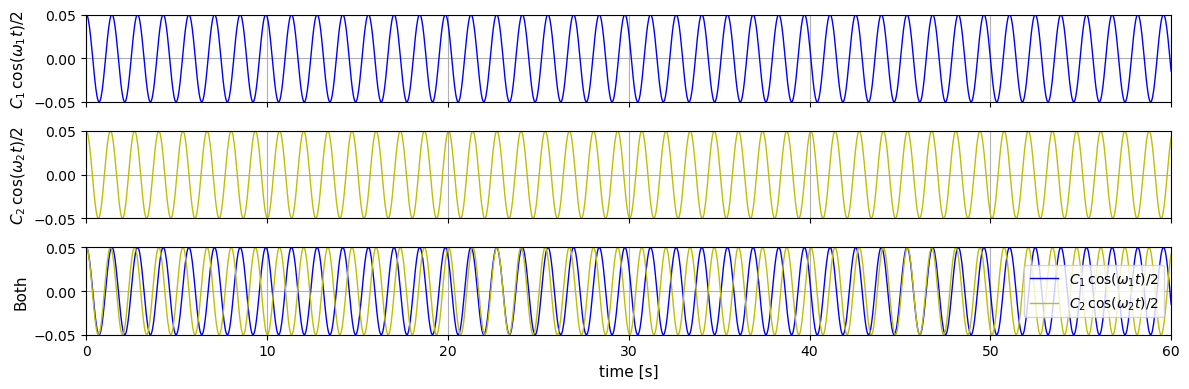

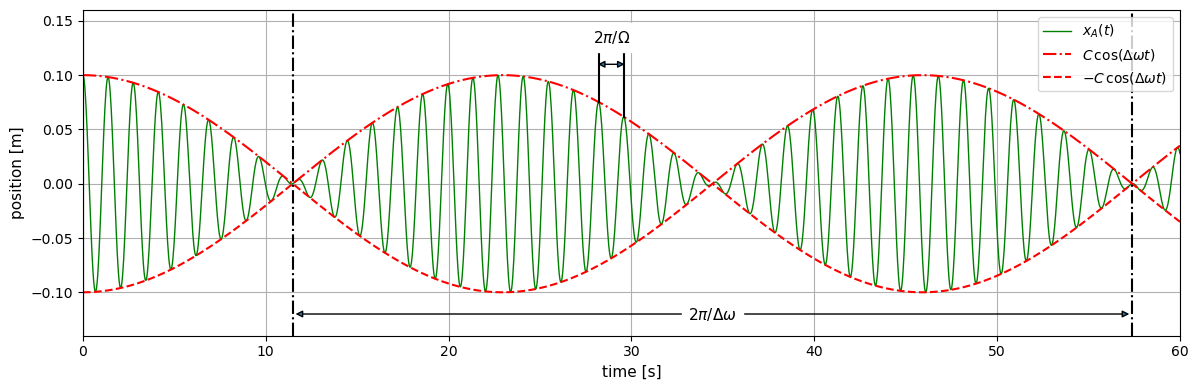

In [4]:
plot_beating(k=0.5, l=0.5, ratioA=1.)  # for pdf export

In [5]:
interact(plot_beating, k=FloatSlider(min=0.5, max=3., step=.1, value=.5), l=FloatSlider(min=0.5, max=2.5, step=.1, value=.5), ratioA=FloatSlider(min=0.0, max=1., step=.1, value=1.))

interactive(children=(FloatSlider(value=0.5, description='k', max=3.0, min=0.5), FloatSlider(value=0.5, descri…

<function __main__.plot_beating(k, l, ratioA)>

Below (Jupyter; also at https://youtu.be/CYnR0haH_Qc and https://play.library.utoronto.ca/081230b94886e73ba70d6016aecd227e), I repeat a demo you saw in lecture 2, illustrating the phenomenon of beating with acoustic waves.

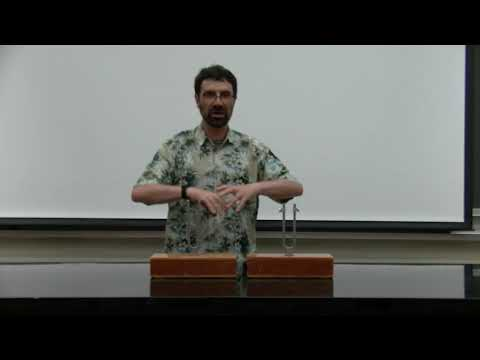

In [6]:
YouTubeVideo('CYnR0haH_Qc', width=560, height=315)

And below is another fun example of beating: the Wilberforce pendulum:

https://ugdemos.physics.utoronto.ca/db/demos/s-h-m-wilberforce-pendulum

(you have to go on the page and scroll down to see the video; for some reason I don't have it, but it is yours truly again)

# An even more general solution method

In the previous case, we had only two coupled oscillators, which meant, two degrees of freedom (two normal coordinates).
It was simple enough that we could solve it "by hand", by defining simple normal coordinates, and adding and subtracting the equations of motion.

But as with all things in linear algebra, difficulty increases rapidly with every equation that we add.
For example, what if we coupled 5 oscillators?
Not to mention the infinity of oscillators that approximate a continuous medium.
We need the systematic and powerful approaches that are offered by linear algebra.
And in particular, we will eventually need to use the eigenvector/eigenvalue formalism, which some of you have probably seen. 
The rest of you can take what follows as a recipe for now, and a first introduction to it.

We will essentially do what is described in the following video (Jupyter) or at https://youtu.be/PFDu9oVAE-g?t=315.
Note that if you go the beginning of this video, the author (Grant Sanderson) says (I am actually paraphrasing him) that if finding eigenvalues and eigenvectors feels complicated, it is usually because our own understanding of vectors and matrices is shaky to begin with.
Fortunately, this particular video is the 10th of 11 videos on linear algreba (https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), so, if your understanding of vectors and matrices feels shaky, you can watch a few.
Careful though, it takes a few hours to go through all of them.

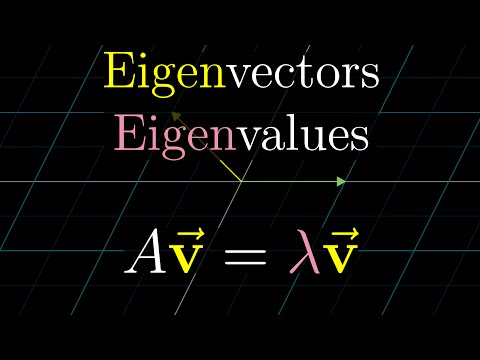

In [7]:
YouTubeVideo('PFDu9oVAE-g', width=560, height=315, start=315)

***
## *Results from Linear Algebra*

*I will not cover the discussion that follows in class. Reading it may help you understand why and how everything works, but it is beyond what I expect of you.*

### *General results*

*Linear algebra can be messy, especially when it comes to whether a matrix is diagonalizable or not. 
Fortunately for us, I will only use a few of the most basic results of linear algebra.*

1. *Finding the eigenvectors and eigenvalues of an $n\times n$ matrix $A$ means finding the vectors $\vec V$ and scalars $\lambda$ such that*
    \begin{equation}
        A \vec V = \lambda \vec V, \oreq (A - \lambda I_n)\vec V = 0,\label{eq:EVProblem}
    \end{equation}
    *with $I_n$ the $n\times n$ identity matrix.*
2. *Equation \eqref{eq:EVProblem} has non-trivial (i.e., non-identically zero, i.e., oscillations with non-zero amplitudes in our case) solutions for $\vec V$ if and only if*
    \begin{equation}
        \det(A - \lambda I_n) = 0.\label{eq:EVProblemDet}
    \end{equation}
    *The determinant of a matrix is a scalar. Here, it is a polynomial in $\lambda$. It is called the characteristic polynomial, and its roots are the eigenvalues.*
3. *If there is a number $n$ of eigenvalues $\lambda$ that are all distinct from each other, then the matrix is diagonalizable, and the set of the corresponding eigenvectors forms a basis for the space of solutions. In other words, if $\vec V_i$, $i \in \{1\dots{} n\}$ is the complete set of eigenvectors, then any linear combination of them,* 
    $$\sum_{i=1}^n a_i \vec V_i = \vec X$$
    *is a solution of the original problem as well. In all our cases, $a_n \in \mathbb R$. Note that with damping, we could have $a_n \in \mathbb C$.*
    *Furthermore, is $\vec X$ is a solution of equation \eqref{eq:EVProblem}, then it can be decomposed as a linear combination of eigenvectors,*
    $$\vec X = \sum_{i=1}^n a_i \vec V_i,$$
    *and this decomposition is unique.*
    *Note: this condition is sufficient, not necessary. Namely, the converse is not true, and a matrix needs not have all* $n$ *eigenvalues distinct from each other to be diagonalizable. But in our cases, they will be, so let's enjoy it.*

### *How does this translate into our results?*

* *First of all, we will have $n = 2$ for two oscillators;*
* *the eigenvectors $\vec V_i$ will have some connection to our normal modes 1 and 2;*
* *the eigenvalues $\lambda_i$ will have some connection to $\omega_{1,2}^2$ (they will be the same actually);*
* *the eigenvectors, in the abstract case, form a basis of the space of solutions. This is a mathematical way to say that any motion of the two masses can be written as the linear combination of two modes, as we saw in the previous section;*
* *solving $\det(A - \lambda I_2) = 0$ for $\lambda$ shows the way for solving coupled systems of oscillators systematically. Finding the roots of the polynomial, however messy it might become, will give us $\omega_1$ and $\omega_2$. Once we have them, substitution into the original eqn. (3) will give us $\vec V_1$ and $\vec V_2$.*

*The math will become super messy, but the procedure is well-defined, and easy to make systematic.*

*Resuming the normal course of operations.*

***

## Coupled pendulums

In order to apply this method, let's recall equations \eqref{eq:mxA} and \eqref{eq:mxB}, and let's make each mass position one component of a state vector. That is, define
$$
\vec X = 
\begin{bmatrix}
    x_A \\ 
    x_B,
\end{bmatrix}$$
and two matrices
$$
M = 
\begin{bmatrix}
    m & 0 \\ 
    0 & m
\end{bmatrix}
\andeq
K = 
\begin{bmatrix}
     \frac{m g}\ell + k & -k \\
     -k & \frac{m g}\ell + k
\end{bmatrix}.$$

Note their compact forms, which makes this method quite flexible: if the masses or lengths of pendulums were different, we could just plug in and solve the same way, as we will do numerically towards the end of the lecture.

You can check that
$$ M\ddot{\vec X} + K \vec X = 
\begin{bmatrix}
    m\ddot x_A + \frac{m g}{\ell} x_A + k(x_A - x_B) \\
    m\ddot x_B + \frac{m g}{\ell} x_B - k(x_A - x_B)
\end{bmatrix}
= 
\begin{bmatrix}
    0 \\
    0
\end{bmatrix},$$
or, more simply, that 
$$\boxed{ M\ddot{\vec X} + K \vec X = 0. }$$

This is our new equation of motion.
It strongly resembles the SHO equation, and its resolution does involve the same steps:

1. adopt an exponential, $\vec Z = \vec Z_0\eexp{\ci \omega t}$, with $(\vec Z_0)\in \mathbb C^2$, $\omega \in \mathbb R$ and $\text{Re}(\vec Z) = \vec X$.
    A few remarks:
    * I did not look for a more vague time dependence in $\eexp{rt}$ like in the previous lectures.
        That's because there is no damping, we don't expect instabilities, and with all of the experience we've built so far, we might as well go straight to the point and look for oscillating motion.
        The power of the adopt-an-exponential method is that if this has been the wrong choice to make, the ODEs would tell us right away.
    * Also note that by enforcing the same time dependence $\eexp{\ci\omega t}$ for both components of the vector, we are explicitly looking for a form of motion in which both masses oscillate at the same frequency, i.e., we are looking for a **normal mode**.
    * The last bit means that $\vec Z$ has two components $z_A$ and $z_B$, both complex, such that $\text{Re}(z_{A, B}) = x_{A, B}$.
2. substitute in the EOM and solve for $\omega$,
3. use initial conditions to solve for $\vec Z_0 = \vec A\eexp{\ci\phi}$.

### The first step...
... implies that $\ddot{\vec Z} = -\omega^2 \vec Z$.
Moreover, $M\ddot{\vec Z} = M (-\omega^2) \vec Z = -\omega^2 M \vec Z$ because the algebra is linear.

### For the second step (solving for $\omega$),
\begin{equation}
M\ddot{\vec Z} + K \vec Z = -\omega^2 M \vec Z + K\vec Z = \boxed{\left(K - \omega^2 M\right)\vec Z = 0.}
\label{eq:K-w2M}
\end{equation}

Let me recall one of the most important results of linear algebra: **A matrix equation** $\bs{RV = 0}$ **has non-trivial (i.e., non-identically zero) solutions if and only if** $\bs{\det[R] =0}$, as I stated in a different form around equation \eqref{eq:EVProblemDet}.
Physically, trivial solutions are zero-amplitude oscillations of each mass position or of each mode.
Trivially speaking, it is nothing.

The matrices $M$ and $K$ both contain elements that are determined by the physics of the system: masses, stiffness, lengths of pendulums and gravitational acceleration.
The only parameter that can be varied is therefore $\omega$, and it is $\omega$ we are solving for.

Mathematically, this step corresponds to finding the **eigenvalues** of equation \eqref{eq:K-w2M}.
It looks different from equation \eqref{eq:EVProblem} though.
However, we can cast our equation in this form very easily by multiplying it with the inverse of matrix $M$, namely,
$$ M^{-1} = 
\begin{bmatrix}
    1/m & 0 \\
    0 & 1/m
\end{bmatrix},
$$
i.e.,
$$
M^{-1}K \vec Z = \omega^2 \vec Z,
$$
which looks like a standard eigenvalue problem. The two ways of writing it are strictly equivalent, the form above would appear if I divided both equations \eqref{eq:mxA} and \eqref{eq:mxB} by $m$.

We will also need the following formula:
$$\boxed{ \det\left(
\begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}
\right) = ad - bc} \quad\textrm{(which I expect you to remember!!!)}.$$

I am going to do it by hand once, but the real advantage to this method is that it is fairly easy to ask a symbolic calculator or symbolic math software to solve for it. I will do it later, but for now, it is instructional to do it by hand.

Here we go:
\begin{align*}
    0 = \det(K - \omega^2 M) & = \det\left(
                                \begin{bmatrix}
                                    \frac{m g}\ell + k - \omega^2 m & -k \\
                                    -k & \frac{m g}\ell + k - \omega^2 m
                                \end{bmatrix}\right) \\
                         & = \left(\frac{m g}\ell + k - \omega^2 m\right)^2 - k^2
                           = m^2 \left[\left(\omega_p^2 + \omega_{s}^2 - \omega^2 \right)^2 - \omega_{s}^4\right]\\
                         & = m^2 \left[\left(\omega_p^2 + \omega_{s}^2 - \omega^2 - \omega_{s}^2 \right)\left(\omega_p^2 + \omega_{s}^2 - \omega^2 + \omega_{s}^2\right)\right]\\
                         & = m^2 \left[\left(\omega_p^2 - \omega^2 \right)\left(\omega_p^2 + 2\omega_{s}^2 - \omega^2\right)\right].
\end{align*}

The characteristic polynomial on the RHS was relatively easy to write as the product of factors, which immediately yields the two roots,
$$\omega_1 = \omega_p\andeq \omega_2 = \sqrt{\omega_p^2 + 2\omega_s^2}.$$
Tadaa.

This might have felt like overkill given how easy it was to find these two frequencies earlier on.
However, take a minute to reflect on how much more systematic this method was: no need to rely on symmetries, intuition or clever changes of variables.
We just followed a recipe, which will later on mean that we can apply this method to much more complicated systems.

### The third step (solving for $\vec A$ and $\phi$)

#### Polarization of the Eigenvectors

We can actually separate $\vec A$ into $C\vec Y$, with $\|\vec Y\| = 1$.
This makes it easier in the sense that we separate the amplitude of the mode, its strength, or weight, if you will, which resides in $C$ and which is calculated with the knowledge of the initial condition, and $\vec Y$, which is a feature of the matrix $K - \omega^2 M$, or of the physical system, and does not depend on the initial conditions.
However, requiring that $\|\vec Y\| = 1$ is not required in order to solve a problem! I do it, but some textbooks might do it differently, and Python certainly doesn't do it.

In this case,
$$ (K - \omega^2 M)\vec Z = 0 = C (K - \omega^2 M)\vec Y \eexp{\ci(\omega t + \phi)} \quad\Leftrightarrow\quad (K - \omega^2 M)\vec Y = 0. $$

Let 
$$\vec Y = 
\begin{bmatrix}
    a \\ 
    b
\end{bmatrix}.$$
Looking for the relationship between $a$ and $b$ for a given mode is called looking for the polarization of that mode.

\begin{align} 
    (K - \omega^2 M)\vec Y & = \begin{bmatrix}
                                m\omega_p^2 + k - \omega^2 m & -k \\
                                -k & m \omega_p^2 + k - \omega^2 m_B
                            \end{bmatrix}
                            \begin{bmatrix}
                                a \\ 
                                b
                            \end{bmatrix} \nonumber\\
                           & = \begin{bmatrix}
                                \left(m \omega_p^2 + k - \omega^2 m\right)a - kb \\ 
                                -ka + \left(m \omega_p^2 + k - \omega^2 m\right)b
                            \end{bmatrix} \nonumber\\
                           & = \begin{bmatrix}
                                   m_A\left[(\omega_p^2 + \omega_s^2 - \omega^2 )a - \omega_s^2 b \right] \\ 
                                   m_B\left[-\omega_s^2 a + (\omega_p^2 + \omega_s^2 - \omega^2 )b\right]
                               \end{bmatrix} = \stirling{0}{0}. \label{eq:FindEVs}
\end{align}

* Case $\omega^2 = \omega_1^2 = \omega_p^2$:
$$ \begin{bmatrix}
        ka - kb \\ 
        -ka + kb
   \end{bmatrix} = \stirling{0}{0} \thrfor a = b.$$
    *(Notice how the two equations are redundant. This is always the case for $2\times 2$ matrices. For $3\times3$ matrices you need  2 equations, etc.)*
    Therefore, $a=b$, and since $\|\vec Y\| = \sqrt{a^2 + b^2} = 1$, $a = b= 1/\sqrt{2}$.
    This is the antisymmetric mode.

![Fig. 8: the antisymmetric normal mode](pendulum_syn.gif)

* Case $\omega^2 = \omega_2^2 = \omega_p^2 + 2\omega_{s}^2$.
    I just use the first line in equation \eqref{eq:FindEVs} because the second line is redundant again:
    $$ -\omega_{s}^2(a + b) = 0.$$
    Therefore, $a = -b = 1/\sqrt2$, the symmetric mode, oscillating faster because of the spring.

![Fig. 9: the symmetric normal mode, in the case $m_A = m_B$.](pendulum_asyn.gif)

#### Eigenvectors as a basis for all the solutions



So far, the connection with general linear algebra results is the following.

* $\vec Y_1$ and $\vec Y_2$ are eigenvectors of the matrix problem,
* $\omega_1^2$ and $\omega_2^2$ are the eigenvalues (or $\omega_1$ and $\omega_2$ the eigenfrequencies, or normal frequencies) and 
* $\vec X_1 = \text{Re}(\vec Z_1)$ and $\vec X_2 = \text{Re}(\vec Z_2)$ are the eigenmodes of oscillation.

I mentioned earlier that the two eigenvectors form a basis of all the vectors in the problem.
It means that all solutions can be written as a linear combination of these eigenmodes, namely,
$$ \vec X = C_1 \vec Y_1\cos(\omega_1 t + \phi_1) + C_2 \vec Y_2\cos(\omega_2 t + \phi_2),$$
where I switched back to real notation.
The velocity is then simply
$$ \vec V = -\omega_1 C_1 \vec Y_1\sin(\omega_1 t + \phi_1) -\omega_2 C_2 \vec Y_2\sin(\omega_2 t + \phi_2).$$

#### Amplitudes ($C$'s) and phases ($\phi$'s).

One trick to solving any initial value problem is to realize that $\vec Y_1 \cdot \vec Y_2 = 0$ and $\vec Y_1\cdot\vec Y_1 = \vec Y_2 \cdot \vec Y_2 = 1$, which is true in this symmetric problem, though not always (there are always orthogonality relations, but they are not always that simple... but I digress).
Therefore, for any set of initial conditions $\vec X_0$ and $\vec V_0$ (that's four of them), you find the amplitude and phase in each mode by setting $t=0$ in the equations above, dotting with $\vec Y_1$ or $\vec Y_2$ depending on the mode you're after, et voilà.

For example, if you want to find $C_1$ and $\phi_1$, knowing $\vec X_0 = [x_{A0}, x_{B0}]^T$ and $\vec V_0 = [v_{A0}, v_{B0}]^T$, you do
$$\vec X(t=0)\cdot \vec Y_1 
= C_1 \underbrace{\vec Y_1\cdot \vec Y_1}_{{}=1}\cos(\phi_1) + C_2 \underbrace{\vec Y_2\cdot \vec Y_1}_{{}=0}\cos(\phi_2)
= \left(x_{A0} + x_{B0}\right)/\sqrt2$$
and, skipping the same steps as above,
$$\vec V(t=0)\cdot \vec Y_1 
= -\omega_1 C_1 \sin(\phi_1)
= \left(v_{A0} + v_{B0}\right)/\sqrt2.$$
That's a system of two unknown ($C_1$, $\phi_1$) and two equations.

Do the same for the second mode, and you have completely solved the system, with
\begin{align*}
& C_1\cos\phi_1 = \frac{x_{A0} + x_{B0}}{\sqrt{2}},
& C_1\sin\phi_2 = -\frac{v_{A0} + v_{B0}}{\sqrt{2}\omega_1},\\
& C_2\cos\phi_2 = \frac{x_{A0} - x_{B0}}{\sqrt{2}},\andeq
& C_2\sin\phi_2 = -\frac{v_{A0} - v_{B0}}{\sqrt{2}\omega_2}.
\end{align*}

To do a full example would be quite tedious and not super useful.
Let's do something more simple, i.e., the masses held and released from symmetric and antisymmetric initial positions.

Because both initial velocities are zero, we can see from the last equation we wrote that $\phi_1 = \phi_2 = 0$.

The first example is $x_{A0} = x_{B0} = A$, which means that the antisymmetric mode is selected by the initial conditions.
In vector form, this means
$$\vec X_0 = \begin{bmatrix}
    x_A(t=0) \\ 
    x_B(t=0)
\end{bmatrix}
= \begin{bmatrix}
    A \\ 
    A
\end{bmatrix} =  \sqrt{2} A \vec Y_1 + 0\vec Y_2.$$
Bam! No need to do any sort of math, we know right away that the symmetric mode is zero.

The second example is $x_A = -x_B = A$, which means that the symmetric mode is selected by the initial conditions.
In vector form, this means
$$\vec X_0 =
\begin{bmatrix}
    A \\ 
    -A
\end{bmatrix} =  0\vec Y_1 + \sqrt{2}A\vec Y_2.$$
And again! We know right away that the antisymmetric mode is zero.

### Numerical resolution

The equations we have been solving up to now were fairly easy to deal with analytically. 
If the masses had been different, the math would have been a lot hairier, though still doable with a bit of patience.
However, computers can solve these problems very easily, so, let's first see what a symbolic solver could do.

Let's spice up the problem and make $m_A\neq m_B$:
\begin{align*}
m_A\ddot x_A + \frac{m_A g}{\ell} x_A + k(x_A - x_B) & = 0,\\
m_B\ddot x_B + \frac{m_B g}{\ell} x_B - k(x_A - x_B) & = 0.
\end{align*}

The two matrices are now
$$
M = 
\begin{bmatrix}
    m_A & 0 \\ 
    0 & m_B
\end{bmatrix}
\andeq
K = 
\begin{bmatrix}
     \frac{m_A g}\ell + k & -k \\
     -k & \frac{m_B g}\ell + k
\end{bmatrix},$$
and the matrix equation to solve is
$$\boxed{ M\ddot{\vec X} + K \vec X = 0. }$$

Uncharacteristically, I will use the symbolic math package SymPy, only to illustrate its limitations.

We will see in the next lecture that NumPy can do all the math as well, if you give it actual numbers to work with instead of symbolic expressions.

In [8]:
from sympy import *  # here I import the entire symbolic math package
init_printing(use_unicode=True)  # to print pretty

In [9]:
# we need to declare some symbolic quantities
# omega_sA, omega_p, omega = symbols('omega_sA, omega_p, omega', real=True)
g, l = symbols('g, ell', positive=True)
k, m_A, m_B = symbols('k, m_A, m_B', positive=True)

In [10]:
m_A

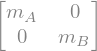

In [11]:
# define the mass matrix
M = Matrix([[m_A, 0],
            [0, m_B]])
M

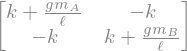

In [12]:
# Define the stiffness matrix
K = Matrix([[m_A*g/l + k, -k],
            [-k, m_B*g/l + k]])
K

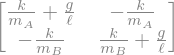

In [13]:
# Compute M**(-1)*K
EVecMat = M.inv()*K
expand(EVecMat)

In [22]:
# A bit of refinement: we can substitute k/m_A by omega_sA, etc.
# but first, we need to declare those symbolic variables
omega_sA, omega_sB = symbols('omega_sA, omega_sB', real=True)
omega_p = Symbol('omega_p', real=True)

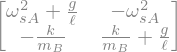

In [15]:
New_EVMat = expand(EVecMat).subs(k/m_A, omega_sA**2); New_EVMat

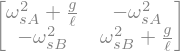

In [16]:
New_EVMat = expand(New_EVMat).subs(k/m_B, omega_sB**2); New_EVMat

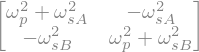

In [17]:
New_EVMat = expand(New_EVMat).subs(g/l, omega_p**2); New_EVMat

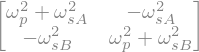

In [18]:
# Or it can be done in one fell swoop:
New_EVMat = (expand(EVecMat).subs(k/m_A, omega_sA**2)
                            .subs(k/m_B, omega_sB**2)
                            .subs(g/l, omega_p**2))
New_EVMat

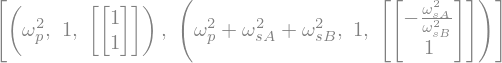

In [19]:
# And now the finishing touch
New_EVMat.eigenvects()

The line above is to be interpreted in the following way:

1. There are two different eigenvalues, $\omega_p^2$ and $\omega_p^2+\omega_{sA}^2+\omega_{sB}^2$. In our simpler analytical calculation, we had $\omega_{sA} = \omega_{sB} = \omega_s$ and $\omega_2 = \omega_p^2+\omega_{sA}^2+\omega_{sB}^2$.
2. each of these eigenvalues appears only once (this is what the "1" numbers mean in second positions),
3. the eigenvectors are $[1, 1]$ (antisymmetric) and $[-\omega_{sA}^2/\omega_{sB}^2, 1]$ (pseudo-symmetric).

Note how python doesn't care about normalizing the eigenvector norms, and that it used a different sign convention than me. This is because it does not really matter.

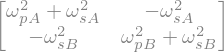

In [20]:
# I can even do it with two different length of pendulums!
l_A, l_B = symbols('ell_A, ell_B', real=True)
omega_pA, omega_pB = symbols('omega_pA, omega_pB', real=True)

# New stiffness matrix
K_2 = Matrix([[m_A*g/l_A + k, -k],
              [-k, m_B*g/l_B + k]])

# new eigenvector problem
EVecMat_2 = M.inv()*K_2
New_EVMat_2 = (expand(EVecMat_2).subs(k/m_A, omega_sA**2)
                                .subs(k/m_B, omega_sB**2)
                                .subs(g/l_A, omega_pA**2)
                                .subs(g/l_B, omega_pB**2))

New_EVMat_2

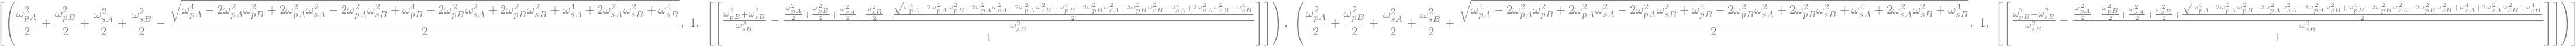

In [21]:
New_EVMat_2.eigenvects()

*Note: the result above is so long that it will not display properly on the pdf version of the notes. Which is the message here: the result is so long, it is not practical to handle it symbolically.*

Obviously, in a practical setting, we would be using a numerical math package, not a symbolic one!
These excruciatingly complicated expressions would become mere numbers, which computers could crunch out.

# Summary

In this lecture, we saw that

* When $n$ (we saw two, but it is more general) oscillators are coupled, the game is to turn the system into $n$ uncoupled oscillations.
    Each equation you find by this procedure is meant to model the behaviour of one **normal mode**.
* A **normal mode** is a mode of motion in which all components of the coupled system oscillate at the same frequency.
    Each components may have phase shifts with respect to the others, and have different amplitudes of motion, but the frequencies have to be the same.
* You can try clever changes of variables to retrieve the **normal modes** in terms of **normal coordinates** oscillating at **normal frequencies**.
* You can also turn the coupled system of equations into a matrix equation and look for the eigenvalues and eigenvectors of the problem.
    Each eigenvalue is the square of a normal frequency, and the associated eigenvector describes the "shape" of the oscillation.
    This method may seem more tedious than the clever method at first, but it always works, even in complicated cases.
* The eigenvalue/eigenvectors is systematic enough that it is easy to program on a computer.
* Each mode is completely decoupled from the others.
    You can see it because each modal ODE does not feature any other mode, or you can see it because the energy of each mode stays constant and does not exchange energy with the other modes, or you can use the language of linear algebra, and the orthogonality of eigenmodes.
* Each mode behaves like an SHO: you can apply the same suite of procedures:
    1. adopt-an-exponential,
    2. find the natural frequencies, which we do when solving for eigenvalues,
    3. Use initial conditions to find the amplitudes and phases (or equivalents) of the oscillation.

# Appendix: Forced Problems

*I will not have time to cover this sub-section, which you should treat as optional.
I wrote it at some point and I find it an interesting connection to the driven oscillators we saw in lecture 5, but I have to make choices.*

Let us assume that there is some periodic force applied to the masses, and let's use $m_A = m_B = m$:
$$ m\ddot x_A + \frac{mg}{l}x_A + k(x_A - x_B) = F_A\cos(\omega t),$$
$$ m\ddot x_B + \frac{mg}{l}x_B -k(x_A - x_B) = F_B\cos(\omega t),$$
which in matrix form can be written
\begin{equation}
    \ddot{\vec X} + M^{-1}K \vec X = \vec \Psi\cos(\omega t),
    \label{eq:forcedEVs}
\end{equation}
with $\vec \Psi = [F_A/m, F_B/m]$.
Note that the problem is not an eigenvalue problem anymore, because it is inhomogeneous.

The vectors $\vec Y_1$ and $\vec Y_2$, which were eigenvectors of the free problem, form an orthogonal basis for any 2D vector.
Let me repeat this: $\vec Y_1$ and $\vec Y_2$ lose their special status as eigenvectors, but they still form an orthogonal basis on which any vector can be decomposed.
Meaning that we can write
$$\vec X = h_1\vec Y_1 + h_2 \vec Y_2.$$

Let me reiterate that the projections of $\vec X$ on $\vec Y_1$ and $\vec Y_2$, i.e., $h_1$  and $h_2$, are not eigenmodes of the forced problem.
"Eigenmodes of the forced problem" makes as much sense as "free oscillations of the forced oscillator" in the case of just one oscillator, which only applies to the boring homogeneous part of the solution.
Note however that in this particular case, $h_1 = q_1/\sqrt2$ and $h_2 = q_2/\sqrt2$ if $q_1 = x_A + x_B$ and $q_2 = x_A - x_B$.

The forcing can also the projected onto $\vec Y_1$ and $\vec Y_2$:
$$\vec\Psi = \Psi_1 \vec Y_1 + \Psi_2 \vec Y_2,$$
with $\Psi_1 = (F_A + F_B)/(\sqrt{2}m)$ and $\Psi_2 = (F_A - F_B)/(\sqrt{2}m)$.

However, the crucial point here is that $M^{-1}K \vec Y_{1, 2} = \omega^2_{1,2}\vec Y_{1, 2}$ is still true, by construction of $\vec Y_{1,2}$.
Collecting all of these comments, eq. \eqref{eq:forcedEVs} can therefore be re-written
$$ \ddot h_1{\vec Y}_1 + \ddot h_2 {\vec Y}_2  + \omega_1^2 h_1 \vec Y_1 + \omega_2^2 h_2 \vec Y_2 = (\Psi_1 \vec Y_1 + \Psi_2 \vec Y_2)\cos(\omega t).$$

Projecting the equation above on $\vec Y_1$ and $\vec Y_2$ yields, respectively,
$$\ddot h_1 + \omega_1^2 h_1 = \Psi_1\cos(\omega t).$$
$$\ddot h_2 + \omega_2^2 h_2 = \Psi_2\cos(\omega t).$$

Therefore, individual modes can resonate, just like a simple oscillator can resonate.
This time however, the complexity of the possible cases increases.
For one mode to resonate, two conditions need to be satisfied.
For example, for the first mode to resonate, we need $\omega = \omega_1$, just like in the simple oscillator case, but we also need $\Psi_1 \neq 0$.

In our coupled pendulums, the first mode (the antisymmetric one) does not grow if the forcing is symmetric, i.e., if $F_A = -F_B$, in which case $\Psi_1 = 0$.
In order to induce a resonance phenomenon, the frequency of the forcing has to match the corresponding frequency, and the forcing pattern needs to match the polarization of the mode, i.e., the "shape of the mode" (i.e. whether it is symmetric or antisymmetric, or whatever the pattern actually looks like), somewhat.
"Somewhat" means that the projection of the force on the eigenvector has to be non-zero.
For example, if only one mass feels a force, say, $F_A \neq 0$ and $F_B = 0$, the pattern is not exactly matched, but $\Psi_1 = F_A/\sqrt{2}m + 0/\sqrt{2} = F_A/\sqrt2m \neq 0$, which is enough to trigger a resonance.

All of this is true for any coupled system of oscillators, and for however many degrees of freedom there are. It is also true for non-symmetric matrices, but the mathematics are more complicated to describe in the short amount of time I have.

Of course, everything you have learned about damped harmonic oscillator resonance also applies to the modes.
For example, if there is damping, the resonance curve will have a certain width:
there can be amplification for frequencies that do not exactly match the eigenfrequencies of the free system.
Each mode will have its own damping rate, and its own quality factor.